                                                                     
  ###################################################################
  ##  A PYTHON VERSION OF CHEVIE-GAP FOR (FINITE) COXETER GROUPS   ##
  ##      (by Meinolf Geck,  version 1r6p180, 27 Jan 2014)         ##
  ##                                                               ##
  ##  To get started type "help(coxeter)" or "help(allfunctions)"; ##
  ##  see also http://dx.doi.org/10.1112/S1461157012001064.        ##
  ##  For notes about this version type  "versioninfo(1.6)".       ##
  ##  Check www.mathematik.uni-stuttgart.de/~geckmf for updates.   ##
  ##                                                               ##
  ##  Import into "sage" (4.7 or higher, www.sagemath.org) works.  ##
  ##                                                               ##
  ##       The proposed name for this module is "PyCox".           ##
  ##                  All comments welcome!                        ##
  ##################

[9, 1]

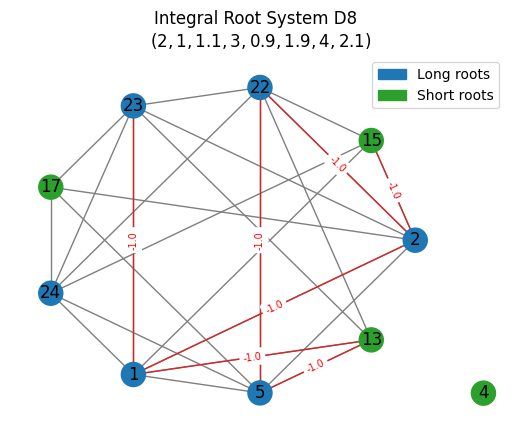

In [1]:
from roots import *
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches
rt1, rt_ind1 = integral_root_system('D', 8, np.array([2, 1, 1.1, 3, 0.9, 1.9, 4, 2.1]))
rt2, rt_ind2 = integral_root_system('E', 8, np.array([1/2, -3/2, -3, -2, -1, -4, -5, -19]))
rt3, rt_ind3 = integral_root_system('F', 4, np.array([4, 5, 3/2, 1/2]))
rt, rt_ind = integral_root_system('F', 4, np.array([7/4, 1/4, 5/4, -3/4]))
rt5, rt_ind5 = integral_root_system('E', 6, np.array([1, 2, 1, 4, 4.5, 0.5, 0.5, -0.5]))
rt6, rt_ind6 = integral_root_system('E', 7, np.array([1/4, 1/4, 1/4, 1/4, 1/4, -3/4, -1, 1]))
rt7, rt_ind7 = integral_root_system('E', 8, np.array([1, 5, 9, 13, 9, 1, 5, 9])/4)

print(rt)
cmat = rt @ rt.T
mat = np.abs(rt @ rt.T) > 1e-7
for i in range(mat.shape[0]):
    mat[i, i] = 0
half_num = int(np.round(mat.shape[0]/2))
root_graph = nx.from_numpy_array(mat[:half_num, :half_num])
decomposed = [root_graph.subgraph(c).copy() for c in nx.connected_components(root_graph)]
# pos = nx.spring_layout(root_graph, k=5)
pos = nx.nx_agraph.graphviz_layout(root_graph, prog='circo')
fig, ax = plt.subplots()

color_map = []
for node in root_graph:
    if np.linalg.norm(rt[node]) > 1.1:
        color_map.append('tab:blue')
    else: 
        color_map.append('tab:green')
nx.draw(root_graph, 
        pos=pos,
        with_labels=True,
        ax=ax,
        node_color=color_map,
        edge_color='tab:grey',
        labels={i: f'{rt_ind[i]+1}' for i in range(half_num)},
        )
edge_labels = {(u, v): f'{cmat[u][v]}' for u, v in root_graph.edges if np.abs(cmat[u][v] + 1) < 1e-7}

nx.draw_networkx_edges(
    root_graph, pos,
    edgelist=[(u, v) for u, v in root_graph.edges if cmat[u][v] < 0],
    edge_color='tab:red'
)

nx.draw_networkx_edge_labels(
    root_graph, pos,
    edge_labels=edge_labels,
    font_color='red',
    font_size=7
)
# Create legend
blue_patch = mpatches.Patch(color='tab:blue', label='Long roots')
green_patch = mpatches.Patch(color='tab:green', label='Short roots')
ax.legend(handles=[blue_patch, green_patch])
ax.title.set_text('Integral Root System D8 \n $(2, 1, 1.1, 3, 0.9, 1.9, 4, 2.1)$')

[len(g) for g in nx.connected_components(root_graph)]

In [2]:
print(root_data('F', 4))

[[ 0.   1.  -1.   0. ]
 [ 0.   0.   1.  -1. ]
 [ 0.   0.   0.   1. ]
 [ 0.5 -0.5 -0.5 -0.5]]


In [3]:
for i in range(rt.shape[0]):
    print(rt_ind[i]+1, rt[i])

1 [ 0.  1. -1.  0.]
2 [ 0.  0.  1. -1.]
4 [ 0.5 -0.5 -0.5 -0.5]
5 [ 0.  1.  0. -1.]
13 [ 0.5 -0.5  0.5  0.5]
15 [ 0.5  0.5 -0.5  0.5]
17 [ 0.5  0.5  0.5 -0.5]
22 [1. 0. 0. 1.]
23 [1. 0. 1. 0.]
24 [1. 1. 0. 0.]
25 [ 0. -1.  1.  0.]
26 [ 0.  0. -1.  1.]
28 [-0.5  0.5  0.5  0.5]
29 [ 0. -1.  0.  1.]
37 [-0.5  0.5 -0.5 -0.5]
39 [-0.5 -0.5  0.5 -0.5]
41 [-0.5 -0.5 -0.5  0.5]
46 [-1.  0.  0. -1.]
47 [-1.  0. -1.  0.]
48 [-1. -1.  0.  0.]


In [4]:
W = pycox.coxeter('E', 7)
lcr = pycox.redleftcosetreps(W, [1,3,4])
print(lcr)

[(0, 1, 2, 3, 4, 5, 6), (63, 1, 7, 3, 4, 5, 6), (7, 1, 65, 9, 4, 5, 6), (0, 1, 2, 3, 4, 12, 69), (0, 1, 2, 3, 11, 68, 12), (7, 14, 3, 72, 16, 5, 6), (70, 1, 0, 9, 4, 5, 6), (63, 1, 7, 3, 4, 12, 69), (7, 1, 65, 9, 11, 68, 12), (2, 1, 70, 13, 4, 5, 6), (63, 1, 7, 3, 11, 68, 12), (7, 1, 65, 9, 4, 12, 69), (0, 1, 2, 17, 74, 4, 12), (0, 1, 2, 3, 18, 75, 5), (0, 1, 2, 3, 11, 6, 75), (7, 77, 3, 1, 16, 5, 6), (2, 1, 70, 13, 11, 68, 12), (0, 1, 2, 3, 18, 69, 68), (70, 1, 0, 9, 11, 68, 12), (0, 1, 2, 24, 81, 4, 5), (70, 1, 0, 9, 4, 12, 69), (7, 1, 65, 23, 74, 4, 12), (2, 19, 3, 76, 20, 5, 6), (70, 14, 13, 72, 16, 5, 6), (63, 1, 7, 17, 74, 4, 12), (7, 1, 65, 9, 11, 6, 75), (63, 1, 7, 3, 18, 75, 5), (65, 1, 63, 13, 4, 5, 6), (0, 1, 2, 17, 74, 18, 75), (7, 14, 3, 4, 79, 23, 6), (2, 1, 70, 13, 4, 12, 69), (7, 14, 3, 72, 23, 68, 12), (7, 1, 65, 9, 18, 75, 5), (0, 22, 23, 80, 3, 4, 12), (7, 14, 3, 72, 16, 12, 69), (63, 1, 7, 3, 11, 6, 75), (0, 29, 30, 87, 3, 4, 5), (0, 22, 23, 80, 3, 18, 75), (7, 14, 

In [8]:
import scipy as sp
aaa = np.array([[1, 0], [0, -1]])
print(sp.linalg.expm(aaa) * np.exp(1))

[[7.3890561 0.       ]
 [0.        1.       ]]
